In [70]:
from meeko import MoleculePreparation
from vina import Vina
from rdkit import Chem
from meeko import PDBQTMolecule
from meeko import PDBQTWriterLegacy

In [71]:
v = Vina(sf_name='vina', cpu=8)
v.set_receptor('Data/9f6a.pdbqt')
v.set_ligand_from_file('Data/lig-1.pdbqt')

docking_box = {"center": [136.733, 172.819, 99.189], "box_size": [11.69, 7.09, 7.60]}
v.compute_vina_maps(**docking_box)

v.dock(exhaustiveness=8, n_poses=5)

Computing Vina grid ... done.
Performing docking (random seed: -1969763019) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -3.087          0          0
   2       -2.952      3.464      3.902
   3       -2.825      2.212      4.255
   4       -2.796      2.434      4.917
   5       -2.656      1.446      1.538


In [72]:
preparator = MoleculePreparation()

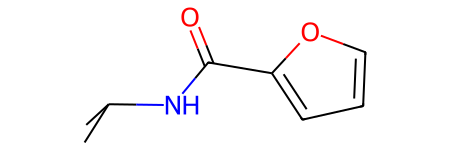

In [84]:
test_lig = Chem.SDMolSupplier('Data/ligands.sdf')[0]
test_lig

In [85]:
test_lig = Chem.AddHs(test_lig)

In [86]:
Chem.rdDistGeom.EmbedMolecule(test_lig)

0

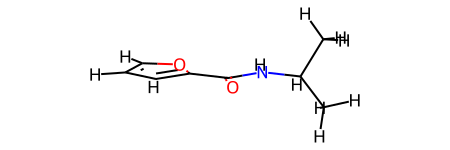

In [87]:
test_lig

In [88]:
mol_setups = preparator.prepare(test_lig)

In [90]:
for setup in mol_setups:
    pdbqt_string, is_ok, error_msg = PDBQTWriterLegacy.write_string(setup)
    if is_ok:
        print(pdbqt_string, end = "")

REMARK SMILES CC(C)NC(=O)c1ccco1
REMARK SMILES IDX 4 1 5 2 6 3 2 5 1 6 3 7 7 8 8 9 11 10 9 11 10 12
REMARK H PARENT 4 4
ROOT
ATOM      1  N   UNL     1       0.619   0.045  -0.216  1.00  0.00    -0.347 N 
ATOM      2  C   UNL     1      -0.563  -0.157   0.550  1.00  0.00     0.287 C 
ATOM      3  O   UNL     1      -0.406  -0.474   1.755  1.00  0.00    -0.266 OA
ATOM      4  H   UNL     1       0.543   0.307  -1.210  1.00  0.00     0.164 HD
ENDROOT
BRANCH   1   5
ATOM      5  C   UNL     1       1.938  -0.105   0.358  1.00  0.00     0.076 C 
ATOM      6  C   UNL     1       2.729   1.185   0.288  1.00  0.00     0.030 C 
ATOM      7  C   UNL     1       2.747  -1.168  -0.312  1.00  0.00     0.030 C 
ENDBRANCH   1   5
BRANCH   2   8
ATOM      8  C   UNL     1      -1.898  -0.004  -0.036  1.00  0.00     0.191 A 
ATOM      9  C   UNL     1      -3.068  -0.191   0.670  1.00  0.00     0.056 A 
ATOM     10  O   UNL     1      -2.246   0.312  -1.236  1.00  0.00    -0.459 OA
ATOM     11  C   UN

In [91]:
ligands = Chem.SDMolSupplier('Data/ligands.sdf')

In [95]:
len(ligands)

2000

In [104]:
for i, mol in enumerate(ligands):
    if mol is None:
        continue
    if i >= 100:
        break
    print(ligands[i].GetProp('_Name'))

s_527____153905____156108	153.181	11	1.418	2	1	2	0.375	42.240	True		True	True			S	NJVSUHKJPNTYGL-UHFFFAOYSA-N
m_22____57676____19882710	179.647	11	0.766	2	1	4	0.857	38.330	True						M	JPZAHQNIVFLHMM-UHFFFAOYSA-N
m_271302____8904550____25575944	158.245	11	0.056	3	1	4	1.000	38.490	True						M	MOEPNVYHZMLGIH-UHFFFAOYSA-N
m_276436____14076548____23408838	199.077	11	2.379	2	0	4	0.857	26.300	True					True	M	ZQNMXDTWADSSJO-UHFFFAOYSA-N
s_62____875850____8349548	170.252	11	3.019	1	0	3	0.333	0.000	True						S	LXQJVNFOCBJMGN-UHFFFAOYSA-N
m_22____57744____13570734	157.213	11	0.403	2	1	4	0.625	40.540	True					True	M	XBNCGGGNWBNXBB-UHFFFAOYSA-N
m_271302____25517132____25492046	158.245	11	-0.291	3	3	4	1.000	44.290	True					True	M	HKYVXLURLQGUSW-JAMMHHFISA-N
m_271302____25517132____25492046	158.245	11	-0.291	3	3	4	1.000	44.290	True					True	M	HKYVXLURLQGUSW-JAMMHHFISA-N
m_270004____8289202____24722536	175.703	11	2.394	1	1	5	1.000	12.030	True						M	JIRDLQXLSDFJHB-UHFFFAOYSA-N
m_282070____22187988____